In [3]:
# Libraries needed for Data Handling and Visualization
import pandas as pd
import matplotlib.pyplot as plt

# 1. Create Sample BMS Data
data = {
    # Time points for the log
    'Time_Minutes': [0, 10, 20, 30, 40, 50, 60, 70],
    # Cell ID for identification (assuming 8 cells)
    'Cell_ID': [1, 2, 3, 4, 5, 6, 7, 8],
    # Voltage values (for context)
    'Voltage_V': [3.7, 3.8, 3.75, 3.85, 3.7, 3.6, 3.75, 3.8],
    # Temperature data (Cell 6 has the critical temperature)
    'Temperature_C': [25, 28, 30, 32, 35, 45, 31, 29] 
}

# Create the Pandas DataFrame (Table Structure)
df = pd.DataFrame(data)

print("--- Loaded Sample BMS Data ---")
print(df)

--- Loaded Sample BMS Data ---
   Time_Minutes  Cell_ID  Voltage_V  Temperature_C
0             0        1       3.70             25
1            10        2       3.80             28
2            20        3       3.75             30
3            30        4       3.85             32
4            40        5       3.70             35
5            50        6       3.60             45
6            60        7       3.75             31
7            70        8       3.80             29


In [4]:
# 2. Define the critical temperature limit
CRITICAL_TEMP = 40 

# 3. Filter Overheated Cells (This is the core Data Analysis step using Pandas)
# Selects only the rows where Temperature is above the critical limit
overheated_cells = df[df['Temperature_C'] > CRITICAL_TEMP]

# 4. Calculate the average temperature
average_temp = df['Temperature_C'].mean()

print("\n--- BMS Analysis Summary ---")
print(f"Average Cell Temperature: {average_temp:.2f}°C")

if not overheated_cells.empty:
    print("\n WARNING: Overheating Cells Detected (Above 40°C):")
    # Display the Time, Cell ID, and Temperature for the unsafe cells
    print(overheated_cells[['Time_Minutes', 'Cell_ID', 'Temperature_C']])
else:
    print(" No Overheating Detected.")


--- BMS Analysis Summary ---
Average Cell Temperature: 31.88°C

   Time_Minutes  Cell_ID  Temperature_C
5            50        6             45


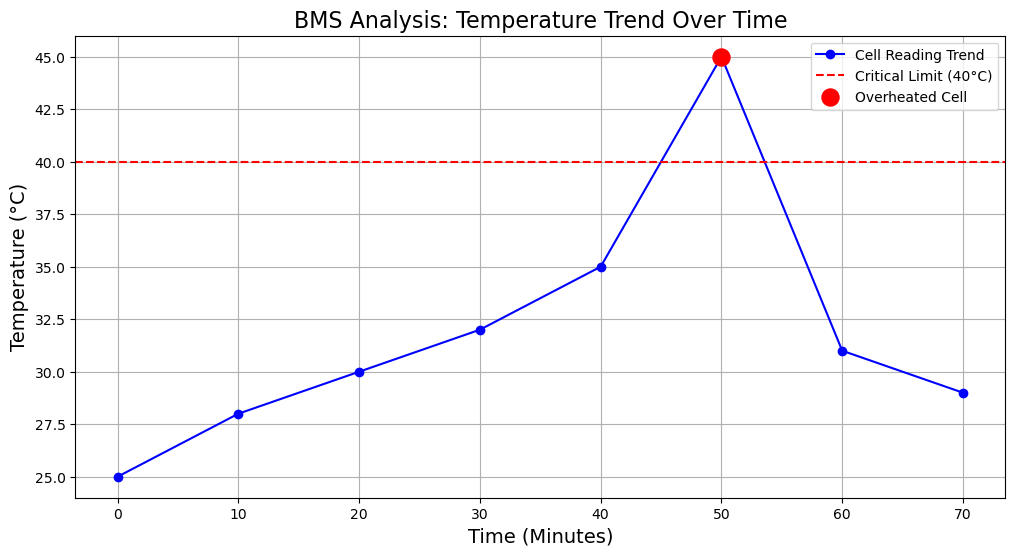

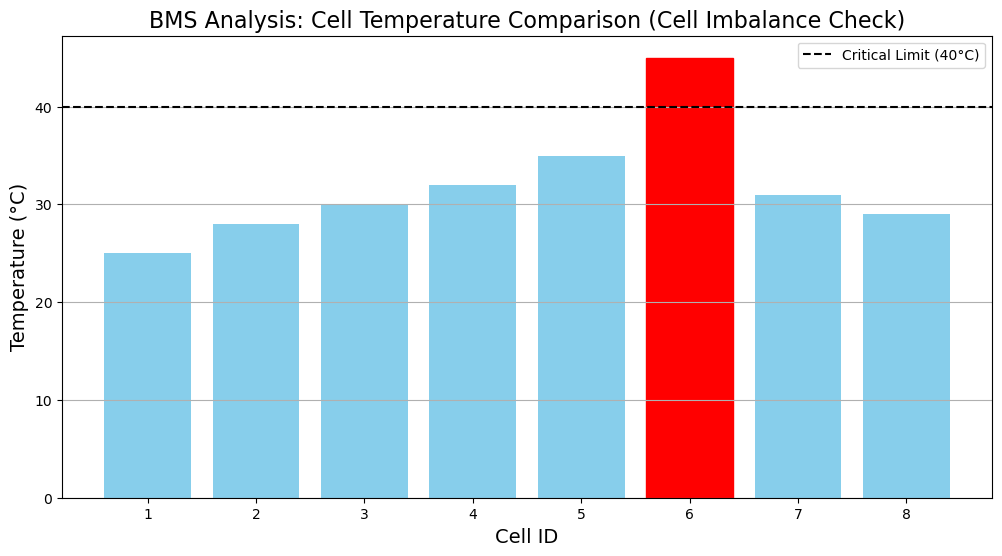

In [5]:
CRITICAL_TEMP = 40 
overheated_cells = df[df['Temperature_C'] > CRITICAL_TEMP]

# ----------------------------------------------------------------------
# PLOT 1: Temperature Trend Over Time (Line Plot)
# Shows the change in temperature reading over the 70 minutes
# ----------------------------------------------------------------------
plt.figure(figsize=(12, 6))
plt.plot(df['Time_Minutes'], df['Temperature_C'], 
         marker='o', linestyle='-', color='blue', label='Cell Reading Trend')

# Add the critical temperature limit line
plt.axhline(y=CRITICAL_TEMP, color='red', linestyle='--', label=f'Critical Limit ({CRITICAL_TEMP}°C)')

# Highlight the overheated point
if not overheated_cells.empty:
    plt.scatter(overheated_cells['Time_Minutes'], overheated_cells['Temperature_C'], 
                color='red', s=150, zorder=5, label='Overheated Cell')

plt.title('BMS Analysis: Temperature Trend Over Time', fontsize=16)
plt.xlabel('Time (Minutes)', fontsize=14)
plt.ylabel('Temperature (°C)', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

# ----------------------------------------------------------------------
# PLOT 2: Cell Temperature Comparison (Bar Chart)
# Shows the temperature of each cell ID to easily identify the hottest cell
# ----------------------------------------------------------------------
plt.figure(figsize=(12, 6))
bars = plt.bar(df['Cell_ID'], df['Temperature_C'], color='skyblue')

# Change the color of the bar for overheated cells to red
for bar, temp in zip(bars, df['Temperature_C']):
    if temp > CRITICAL_TEMP:
        bar.set_color('red')
        
# Add the critical limit line to the bar chart
plt.axhline(y=CRITICAL_TEMP, color='black', linestyle='--', label=f'Critical Limit ({CRITICAL_TEMP}°C)')

plt.title('BMS Analysis: Cell Temperature Comparison (Cell Imbalance Check)', fontsize=16)
plt.xlabel('Cell ID', fontsize=14)
plt.ylabel('Temperature (°C)', fontsize=14)
plt.xticks(df['Cell_ID']) # Ensures X-axis shows discrete Cell IDs
plt.legend()
plt.grid(axis='y')
plt.show()